In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from MPCVelControl_D3_3 import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
# PID - tracking MPC controller simulation
Ts = 0.05
sim_time = 30
H = 6.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Maximum invariant set found after 8 iterations !

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Maximum invariant set found after 8 iterations !

Maximum invariant set found after 1 i

c:\Users\vince\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.25: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.30: 
Simulating time 0.35: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.40: 
Simulating time 0.45: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.50: 
Simulating time 0.55: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=599, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1b77e7d7260>,
 'scene_objects': {'rocket_actor': Actor (0x1b77ea7cb80)
    Center:                     (50.32007, 49.9984915, 100.58848449999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    4.936E+01, 5.128E+01
    Y Bounds                    4.879E+01, 5.121E+01
    Z Bo

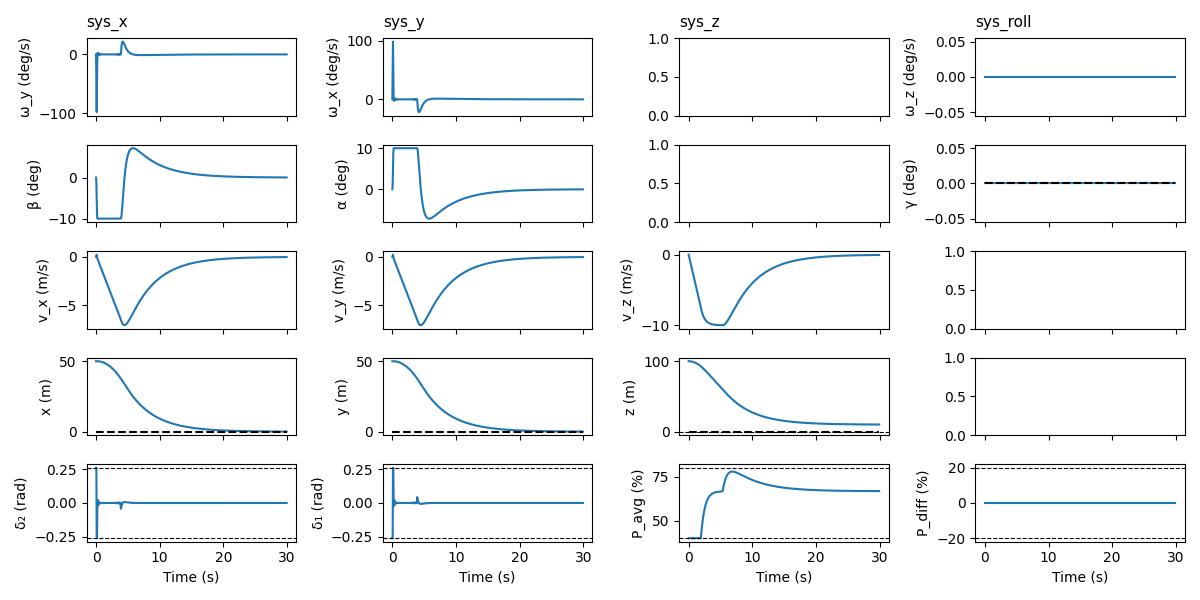

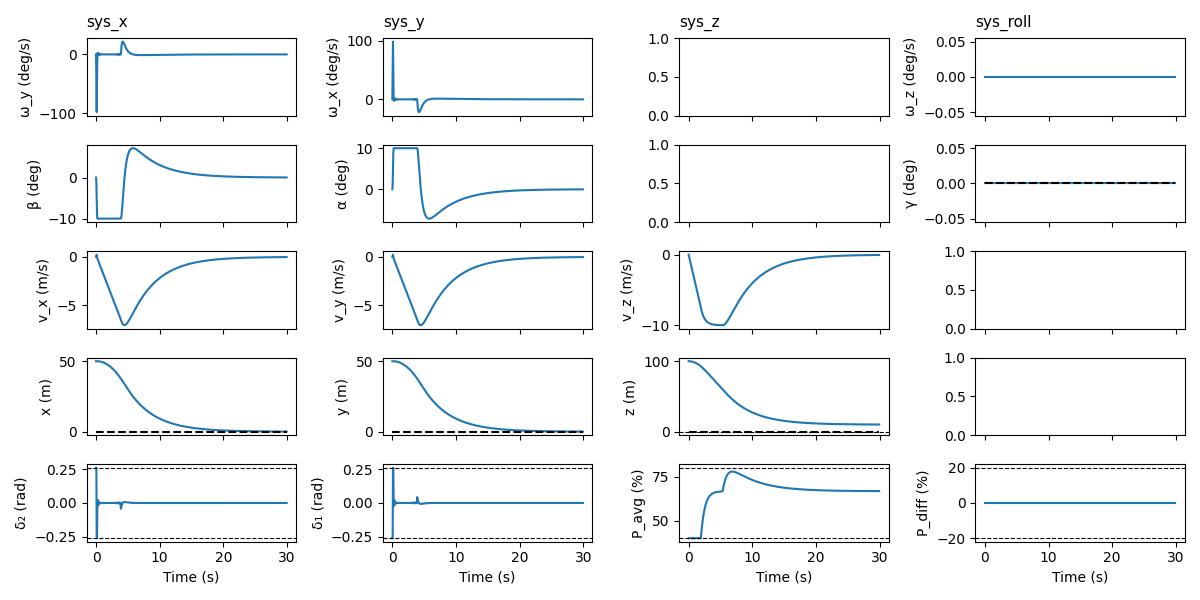

In [ ]:
# plots for the PID - tracking MPC controller

from src.vel_rocket_vis import plot_static_states_inputs
import matplotlib.pyplot as plt

T = t_cl[:-1]
X = x_cl[:, :-1]
U = u_cl
ref = ref[:,:-1]

plot_static_states_inputs(T, X, U, ref)
# plt.savefig("PID_closedloop_states_inputs.pdf", bbox_inches="tight")
plt.show()

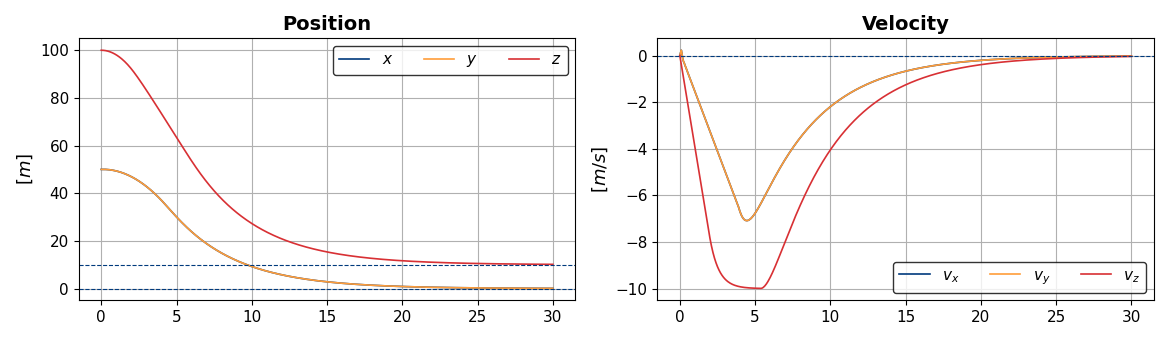

In [ ]:
#close-up plots for the PID - MPC controller
import matplotlib.pyplot as plt
from plot_style import set_mpc_style
set_mpc_style()

LABEL_FONTSIZE = 13
TICK_FONTSIZE  = 11
TITLE_FONTSIZE = 14
LEGEND_FONTSIZE = 11

x0 = np.array([
    0, 0, 0,   # angular rates
    0, 0, 0,   # angles
    0, 0, 0,   # velocities
    50, 50, 100  # positions
])

fig, axs = plt.subplots(1, 2, figsize=(11.69, 3.4))

# --- Position ---
axs[0].plot(t_cl, x_cl[9, :], label=r"$x$")
axs[0].plot(t_cl, x_cl[10, :], label=r"$y$")
axs[0].plot(t_cl, x_cl[11, :], label=r"$z$")
axs[0].axhline(0, linestyle="--", linewidth=0.8)
axs[0].axhline(10, linestyle="--", linewidth=0.8)
axs[0].tick_params(labelsize=TICK_FONTSIZE)
axs[0].set_title("Position",fontsize=TITLE_FONTSIZE, fontweight="bold")
axs[0].set_ylabel("$[m]$",fontsize=LABEL_FONTSIZE)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels, loc="upper right", ncol=3, fontsize=LEGEND_FONTSIZE, frameon=True,
           fancybox=True, edgecolor="black",
)
axs[0].grid()

# --- Velocity ---
axs[1].plot(t_cl, x_cl[6, :], label=r"$v_x$")
axs[1].plot(t_cl, x_cl[7, :], label=r"$v_y$")
axs[1].plot(t_cl, x_cl[8, :], label=r"$v_z$")
axs[1].axhline(0, linestyle="--", linewidth=0.8)
axs[1].tick_params(labelsize=TICK_FONTSIZE)
axs[1].set_title("Velocity",fontsize=TITLE_FONTSIZE, fontweight="bold")
axs[1].set_ylabel("$[m/s]$",fontsize=LABEL_FONTSIZE)
handles, labels = axs[1].get_legend_handles_labels()

axs[1].legend(handles, labels, loc="lower right", ncol=3, fontsize=LEGEND_FONTSIZE, frameon=True,
           fancybox=True, edgecolor="black",
)
axs[1].grid()


plt.tight_layout()
# plt.savefig("PID_close_up_convergence.pdf", bbox_inches="tight")
plt.show()
